In [1]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
from tqdm import tqdm_notebook as tqdm

from data import cities, prime_cities, prime_set
from metrics import metric

from random import sample
from time import time
from multiprocessing import Pool, cpu_count
from pathlib import Path

In [2]:
jtplot.style(figsize=(24, 15))
N = len(cities)
SAVED_GREEDY_PATH = Path("greedy.path")

[]

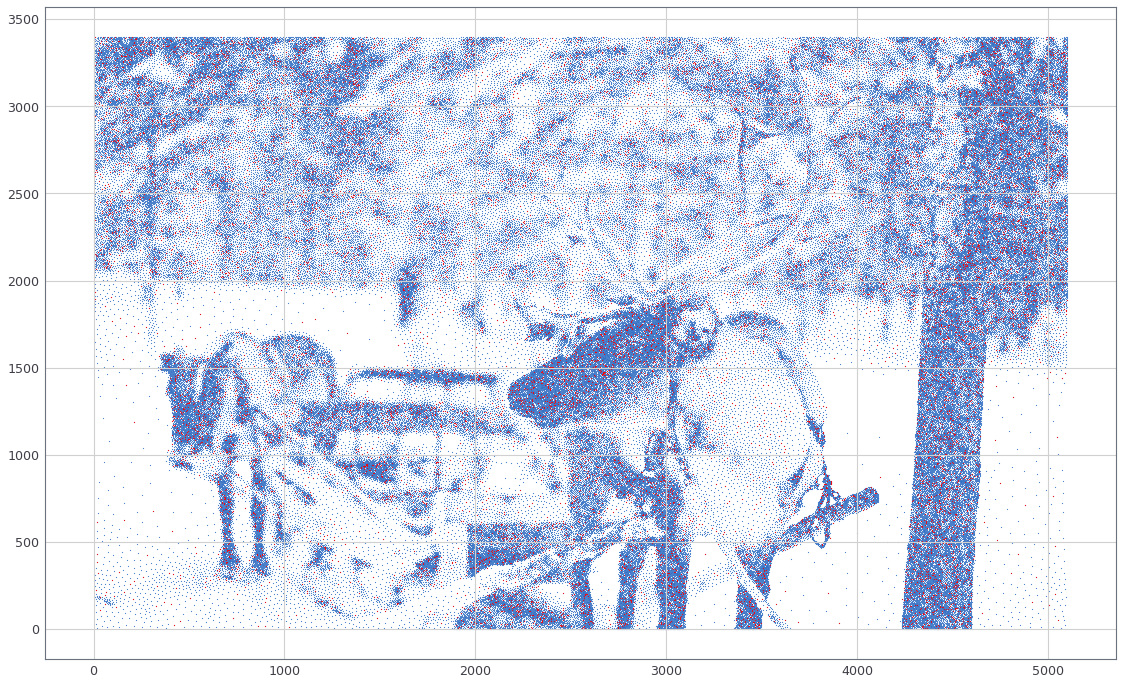

In [3]:
plt.scatter(cities[:,0], cities[:,1], s=1)
plt.scatter(cities[prime_cities,0], cities[prime_cities,1], s=1, c="red")
plt.plot()

In [4]:
def mutate(path):
    path = path.copy()
    i, j = sample(range(len(path)), 2)
    path[i], path[j] = path[j], path[i]
    return path

In [5]:
if not SAVED_GREEDY_PATH.exists():
    unvisited = np.array(range(1, N))
    greedy_path = [0]
    node = 0
    for _ in tqdm(range(len(unvisited))):
        dists = la.norm(cities[unvisited]-cities[node], axis=1) # What is KDTree
        node = unvisited[np.argmin(dists, axis=0)]              # Unfortunately none of the exisiting implementations support deletion
        greedy_path.append(node)                                # So we are left with this terrible O(n^2) code that takes an hour
        unvisited = np.setdiff1d(unvisited, np.array([node]))
    with SAVED_GREEDY_PATH.open("w") as f:                      # at least we can serialize the results
        f.write(" ".join(map(str, greedy_path)))
else:
    with SAVED_GREEDY_PATH.open("r") as f:
        line = f.read()
        greedy_path = list(
                    map(
                        int, 
                        line.split()
                    )
                )

In [6]:
SAVED_GREEDY_PATH

PosixPath('greedy.path')

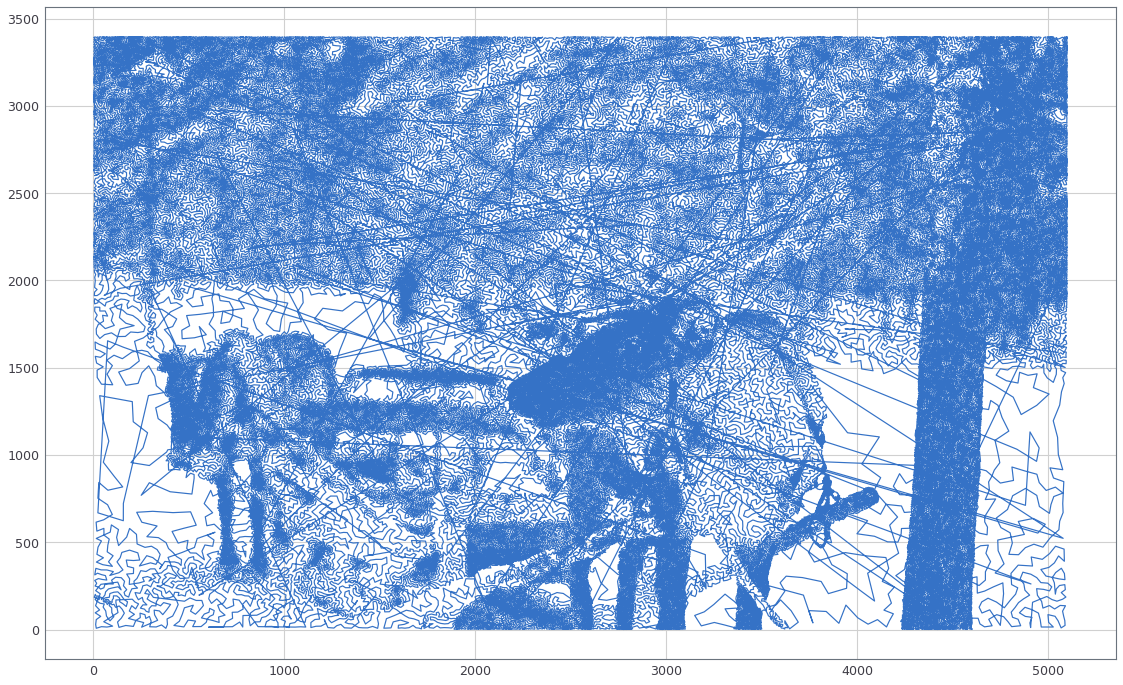

In [7]:
path_coords = cities[greedy_path]
plt.plot(path_coords[:,0], path_coords[:,1])
plt.show()

In [8]:
metric(greedy_path)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

34400
34410
34420
34430
34440
34450
34460
34470
34480
34490
34500
34510
34520
34530
34540
34550
34560
34570
34580
34590
34600
34610
34620
34630
34640
34650
34660
34670
34680
34690
34700
34710
34720
34730
34740
34750
34760
34770
34780
34790
34800
34810
34820
34830
34840
34850
34860
34870
34880
34890
34900
34910
34920
34930
34940
34950
34960
34970
34980
34990
35000
35010
35020
35030
35040
35050
35060
35070
35080
35090
35100
35110
35120
35130
35140
35150
35160
35170
35180
35190
35200
35210
35220
35230
35240
35250
35260
35270
35280
35290
35300
35310
35320
35330
35340
35350
35360
35370
35380
35390
35400
35410
35420
35430
35440
35450
35460
35470
35480
35490
35500
35510
35520
35530
35540
35550
35560
35570
35580
35590
35600
35610
35620
35630
35640
35650
35660
35670
35680
35690
35700
35710
35720
35730
35740
35750
35760
35770
35780
35790
35800
35810
35820
35830
35840
35850
35860
35870
35880
35890
35900
35910
35920
35930
35940
35950
35960
35970
35980
35990
36000
36010
36020
36030
36040
36050
3606

74390
74400
74410
74420
74430
74440
74450
74460
74470
74480
74490
74500
74510
74520
74530
74540
74550
74560
74570
74580
74590
74600
74610
74620
74630
74640
74650
74660
74670
74680
74690
74700
74710
74720
74730
74740
74750
74760
74770
74780
74790
74800
74810
74820
74830
74840
74850
74860
74870
74880
74890
74900
74910
74920
74930
74940
74950
74960
74970
74980
74990
75000
75010
75020
75030
75040
75050
75060
75070
75080
75090
75100
75110
75120
75130
75140
75150
75160
75170
75180
75190
75200
75210
75220
75230
75240
75250
75260
75270
75280
75290
75300
75310
75320
75330
75340
75350
75360
75370
75380
75390
75400
75410
75420
75430
75440
75450
75460
75470
75480
75490
75500
75510
75520
75530
75540
75550
75560
75570
75580
75590
75600
75610
75620
75630
75640
75650
75660
75670
75680
75690
75700
75710
75720
75730
75740
75750
75760
75770
75780
75790
75800
75810
75820
75830
75840
75850
75860
75870
75880
75890
75900
75910
75920
75930
75940
75950
75960
75970
75980
75990
76000
76010
76020
76030
76040
7605

114390
114400
114410
114420
114430
114440
114450
114460
114470
114480
114490
114500
114510
114520
114530
114540
114550
114560
114570
114580
114590
114600
114610
114620
114630
114640
114650
114660
114670
114680
114690
114700
114710
114720
114730
114740
114750
114760
114770
114780
114790
114800
114810
114820
114830
114840
114850
114860
114870
114880
114890
114900
114910
114920
114930
114940
114950
114960
114970
114980
114990
115000
115010
115020
115030
115040
115050
115060
115070
115080
115090
115100
115110
115120
115130
115140
115150
115160
115170
115180
115190
115200
115210
115220
115230
115240
115250
115260
115270
115280
115290
115300
115310
115320
115330
115340
115350
115360
115370
115380
115390
115400
115410
115420
115430
115440
115450
115460
115470
115480
115490
115500
115510
115520
115530
115540
115550
115560
115570
115580
115590
115600
115610
115620
115630
115640
115650
115660
115670
115680
115690
115700
115710
115720
115730
115740
115750
115760
115770
115780
115790
115800
115810

154380
154390
154400
154410
154420
154430
154440
154450
154460
154470
154480
154490
154500
154510
154520
154530
154540
154550
154560
154570
154580
154590
154600
154610
154620
154630
154640
154650
154660
154670
154680
154690
154700
154710
154720
154730
154740
154750
154760
154770
154780
154790
154800
154810
154820
154830
154840
154850
154860
154870
154880
154890
154900
154910
154920
154930
154940
154950
154960
154970
154980
154990
155000
155010
155020
155030
155040
155050
155060
155070
155080
155090
155100
155110
155120
155130
155140
155150
155160
155170
155180
155190
155200
155210
155220
155230
155240
155250
155260
155270
155280
155290
155300
155310
155320
155330
155340
155350
155360
155370
155380
155390
155400
155410
155420
155430
155440
155450
155460
155470
155480
155490
155500
155510
155520
155530
155540
155550
155560
155570
155580
155590
155600
155610
155620
155630
155640
155650
155660
155670
155680
155690
155700
155710
155720
155730
155740
155750
155760
155770
155780
155790
155800

1966903.4999484005

In [9]:
#with open(f"submit/greedy-{time()}.csv", "w") as f:
#    f.write("Path\n")
#    for city in greedy_path:
#        f.write(f"{city}\n")
#    f.write(f"0\n")